In [ ]:
cd /content/drive/MyDrive/Master/CS2310.CH190/Lab2/Image-Classification-CIFAR100

/content/drive/MyDrive/Master/CS2310.CH190/Lab2/Image-Classification-CIFAR100


In [ ]:
!pip install -r requirements.txt

ERROR: Could not find a version that satisfies the requirement transformer (from versions: none)
ERROR: No matching distribution found for transformer


In [ ]:
!pip install "transformers[torch]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 104.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvji

In [ ]:
!pip install torch-optimizer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 6.1 MB/s eta 0:00:00


In [ ]:
!python main.py --option 8

2025-05-29 10:25:06.142234: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-29 10:25:06.157792: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748514306.176067    4108 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748514306.181422    4108 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-29 10:25:06.199667: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

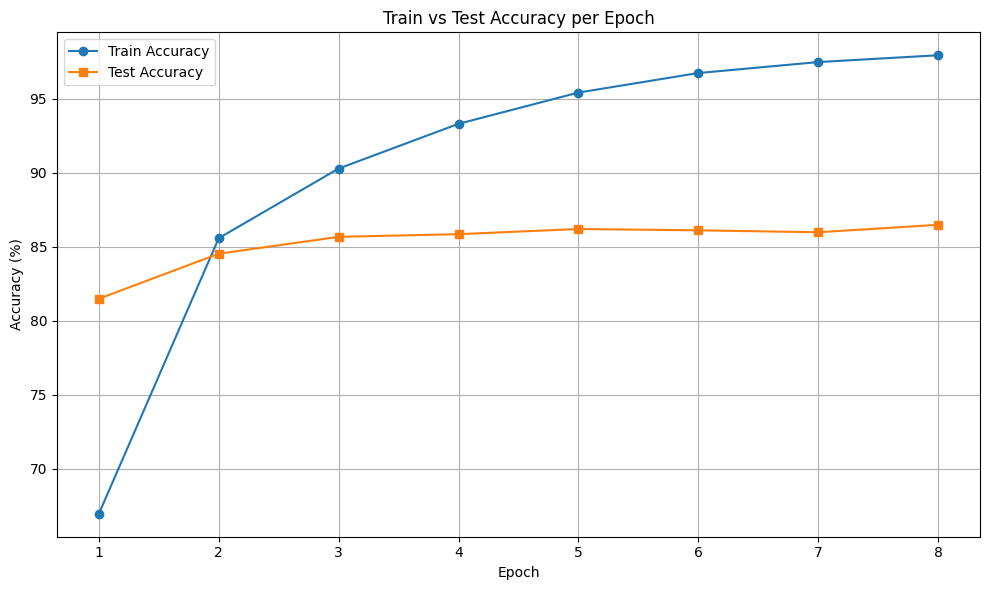

In [1]:
import re
import matplotlib.pyplot as plt

log_data = """
[SwinTransformer] Epoch 1: Train Loss=1.2841, Train Accuracy=66.97%
[SwinTransformer] Test Accuracy: 81.49% | Avg Loss: 0.6033
[SwinTransformer] Best model saved with accuracy 81.49%
[SwinTransformer] Epoch 2: Train Loss=0.4770, Train Accuracy=85.58%
[SwinTransformer] Test Accuracy: 84.53% | Avg Loss: 0.5043
[SwinTransformer] Best model saved with accuracy 84.53%
[SwinTransformer] Epoch 3: Train Loss=0.3156, Train Accuracy=90.28%
[SwinTransformer] Test Accuracy: 85.67% | Avg Loss: 0.4605
[SwinTransformer] Best model saved with accuracy 85.67%
[SwinTransformer] Epoch 4: Train Loss=0.2174, Train Accuracy=93.30%
[SwinTransformer] Test Accuracy: 85.85% | Avg Loss: 0.4731
[SwinTransformer] Best model saved with accuracy 85.85%
[SwinTransformer] Epoch 5: Train Loss=0.1525, Train Accuracy=95.41%
[SwinTransformer] Test Accuracy: 86.20% | Avg Loss: 0.4825
[SwinTransformer] Best model saved with accuracy 86.20%
[SwinTransformer] Epoch 6: Train Loss=0.1122, Train Accuracy=96.73%
[SwinTransformer] Test Accuracy: 86.11% | Avg Loss: 0.5008
[SwinTransformer] Epoch 7: Train Loss=0.0876, Train Accuracy=97.47%
[SwinTransformer] Test Accuracy: 85.98% | Avg Loss: 0.5318
[SwinTransformer] Epoch 8: Train Loss=0.0713, Train Accuracy=97.93%
[SwinTransformer] Test Accuracy: 86.48% | Avg Loss: 0.5213
[SwinTransformer] Best model saved with accuracy 86.48%
"""

def extract_accuracies(log_text):
    train_acc = list(map(float, re.findall(r"Train Accuracy=(\d+\.\d+)%", log_text)))
    test_acc = list(map(float, re.findall(r"Test Accuracy: (\d+\.\d+)%", log_text)))
    epochs = list(range(1, len(train_acc) + 1))
    return epochs, train_acc, test_acc

def plot_accuracies(epochs, train_acc, test_acc):
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_acc, label="Train Accuracy", marker='o')
    plt.plot(epochs, test_acc, label="Test Accuracy", marker='s')
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy (%)")
    plt.title("Train vs Test Accuracy per Epoch")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Chạy hiển thị
epochs, train_acc, test_acc = extract_accuracies(log_data)
plot_accuracies(epochs, train_acc, test_acc)
